In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.stastical_modeling import *

In [5]:
data = pd.read_csv('../data/MachineLearningRating_v3.csv', low_memory=False, index_col=False) 

In [6]:
models = Modelling(data)

In [7]:
numeric_features = ['SumInsured', 'CalculatedPremiumPerTerm','RegistrationYear','PostalCode'] 
categorical_features = ['Province', 'CoverType', 'VehicleType', 'make', 'Gender', 'MaritalStatus','PostalCode','Model','CoverCategory','NewVehicle','RegistrationYear','Citizenship' ]
features = list(set(numeric_features) | set(categorical_features) - set(['TotalPremium', 'TotalClaims']))

## Encode categorical variables using label encoder

In [8]:
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [9]:
X = data[features]
y_premium = data['TotalPremium']
y_claims= data['TotalClaims']

# split the data
X_train, X_test, y_claims_train, y_claims_test=models.split_data(X,y_claims)
X_train, X_test, y_premium_train, y_premium_test=models.split_data(X,y_premium)

## Model Building - Train Linear Regression Model

In [10]:
model_claim = LinearRegression()
model_premium=LinearRegression()
model_claim.fit(X_train, y_claims_train) 
model_premium.fit(X_train, y_premium_train)

LinearRegression()

In [11]:
print ('Totalclaims Linear Regression result')
models.model_testing(model_claim, X_test, y_claims_test)
print('')
print('Total Premium Linear Regression Result')
models.model_testing(model_premium, X_test,y_premium_test)

Totalclaims Linear Regression result
Mean Absolute Error (MAE): 136.32854995348504
Mean Squared Error (MSE): 4869145.917474376
Root Mean Squared Error (RMSE): 2206.6141297187364
R-squared: 0.003528408328496213

Total Premium Linear Regression Result
Mean Absolute Error (MAE): 58.80546932405382
Mean Squared Error (MSE): 16735.97498044189
Root Mean Squared Error (RMSE): 129.36759633092782
R-squared: 0.39336428869835827


## Model Training

In [12]:
Linear_Regression = LinearRegression()
Linear_Regression .fit(X_train, y_claims_train) 

Decision_Tree = DecisionTreeRegressor(random_state=42)
Decision_Tree.fit(X_train, y_claims_train)

Random_Forest =RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_claims_train)


RandomForestRegressor(random_state=42)

In [13]:
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    
}

for model in [Linear_Regression, Decision_Tree, Random_Forest]:
    print(f"{model_names[model]} Model result for TotalClaims")
    
    # Perform model testing
    models.model_testing(model, X_test, y_claims_test)
    print()

Linear Regression Model result for TotalClaims
Mean Absolute Error (MAE): 136.32854995348504
Mean Squared Error (MSE): 4869145.917474376
Root Mean Squared Error (RMSE): 2206.6141297187364
R-squared: 0.003528408328496213

Decision Tree Model result for TotalClaims
Mean Absolute Error (MAE): 133.9773321984625
Mean Squared Error (MSE): 5958065.847402663
Root Mean Squared Error (RMSE): 2440.9149611165612
R-squared: -0.2193192520557079

Random Forest Model result for TotalClaims
Mean Absolute Error (MAE): 133.71596017671516
Mean Squared Error (MSE): 5913293.764224332
Root Mean Squared Error (RMSE): 2431.7264986474797
R-squared: -0.21015663714473343



Plotting for Linear Regression


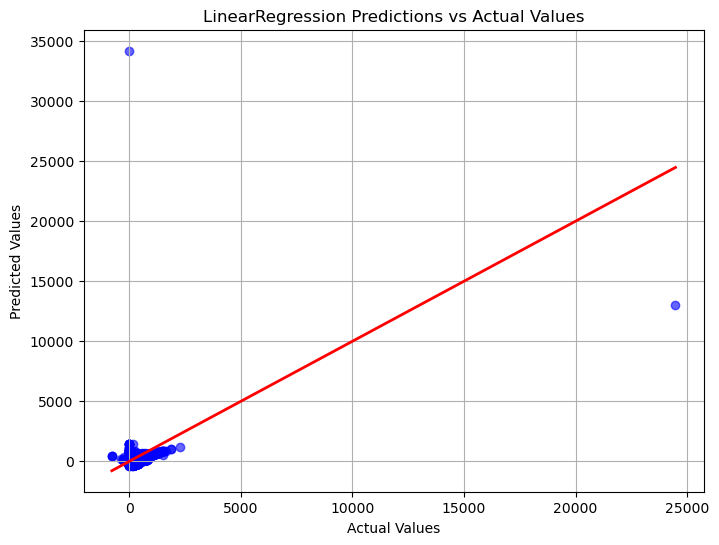


Plotting for Decision Tree


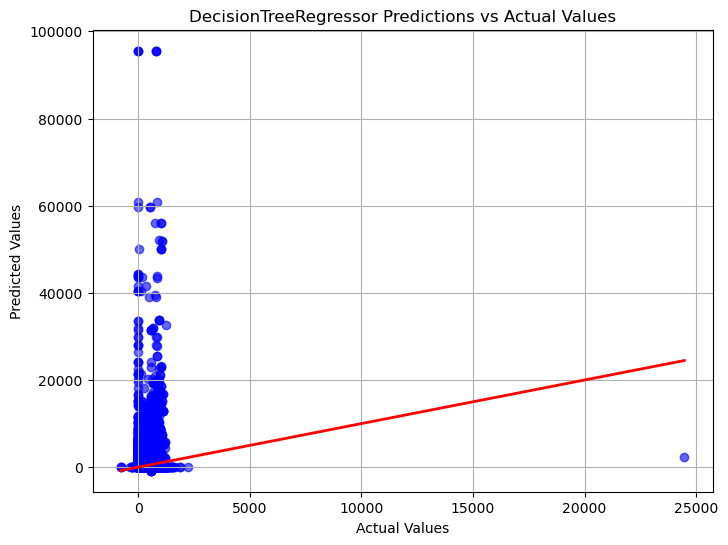


Plotting for Random Forest


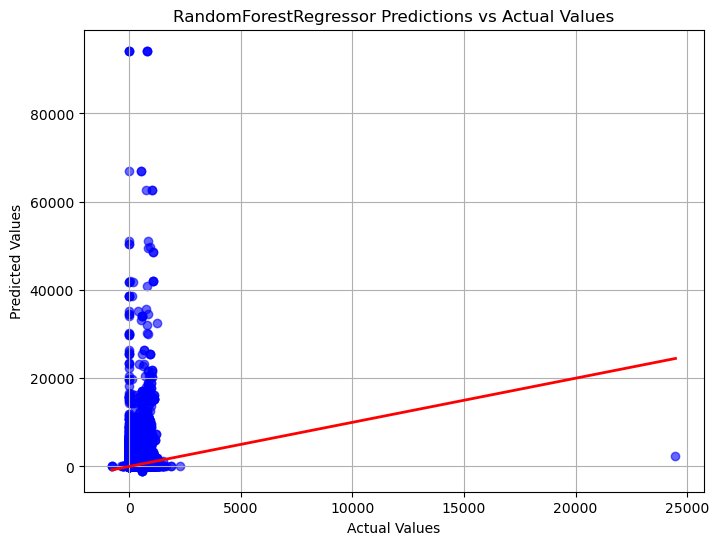

In [14]:
for model in [Linear_Regression, Decision_Tree, Random_Forest]:
    print(f"Plotting for {model_names[model]}")
    plot_predictions_vs_actuals(model, X_test, y_premium_test)
    print()